# Life Expectancy EDA

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

- Country & Region: Includes data from a diverse range of countries across continents, categorized by their respective regions.  
- Life Expectancy: The average life expectancy in years for each country.  
- Socio-economic Indicators:  
    - GDP per capita  
    - Schooling (average years of education)  
    - Alcohol consumption  
    - Economy status (developed or developing)  
- Health Indicators:  
    - Infant mortality  
    - Adult mortality  
    - HIV prevalence  
    - Immunization rates (e.g., Hepatitis B, Polio)  
    - Incidence of diseases like measles and diphtheria  
    - BMI (Body Mass Index) data  
    - Thinness prevalence among children and adolescents  


<span style="color:green">__1. Country (object):__</span> Name of the country.  
<span style="color:green">__2. Region (object):__</span> Geographic region of the country.  
<span style="color:green">__3. Year (float64):__</span> Year of the data (averaged or interpolated).  
<span style="color:green">__4. Infant_deaths (float64):__</span> Number of infant deaths per 1000 live births.  
<span style="color:green">__5. Under_five_deaths (float64):__</span> Number of deaths of children under five per 1000 live births.  
<span style="color:green">__6. Adult_mortality (float64):__</span> Adult mortality rate per 1000 population.  
<span style="color:green">__7. Alcohol_consumption (float64):__</span> Per capita alcohol consumption in liters of pure alcohol.  
<span style="color:green">__8. Hepatitis_B (float64):__</span> Percentage of immunization coverage for Hepatitis B.  
<span style="color:green">__9. Measles (float64):__</span> Number of reported measles cases.  
<span style="color:green">__10. BMI (float64):__</span> Average Body Mass Index of the population.  
<span style="color:green">__11. Polio (float64):__</span> Percentage of immunization coverage for polio.  
<span style="color:green">__12. Diphtheria (float64):__</span> Percentage of immunization coverage for diphtheria.  
<span style="color:green">__13. Incidents_HIV (float64):__</span> Number of new HIV infections per 1000 uninfected population.  
<span style="color:green">__14. GDP_per_capita (float64):__</span> Gross Domestic Product per capita in USD.  
<span style="color:green">__15. Population_mln (float64):__</span> Population size in millions.  
<span style="color:green">__16. Thinness_ten_nineteen_years (float64):__</span> Prevalence of thinness (BMI < 18.5) among adolescents aged 10-19.  
<span style="color:green">__17. Thinness_five_nine_years (float64):__</span> Prevalence of thinness (BMI < 18.5) among children aged 5-9.  
<span style="color:green">__18. Schooling (float64):__</span> Average years of schooling.  
<span style="color:green">__19. Economy_status (float64):__</span> Economic classification of the country (e.g., developing or developed).  
<span style="color:green">__20. Life_expectancy (float64):__</span> Average life expectancy in years.  

### make it positive :) 

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.columns = [columns.lower().replace(" ", "_") for columns in df.columns]

In [4]:
df.head()

,country,region,year,infant_deaths,under_five_deaths,adult_mortality,alcohol_consumption,hepatitis_b,measles,bmi,polio,diphtheria,incidents_hiv,gdp_per_capita,population_mln,thinness_ten_nineteen_years,thinness_five_nine_years,schooling,economy_status,life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


In [5]:
df.drop(columns="year", inplace=True)

In [6]:
df.columns

Index(['country', 'region', 'infant_deaths', 'under_five_deaths',
       'adult_mortality', 'alcohol_consumption', 'hepatitis_b', 'measles',
       'bmi', 'polio', 'diphtheria', 'incidents_hiv', 'gdp_per_capita',
       'population_mln', 'thinness_ten_nineteen_years',
       'thinness_five_nine_years', 'schooling', 'economy_status',
       'life_expectancy'],
      dtype='object')

In [7]:
num = df.select_dtypes("number")

Text(0.5, 1.0, 'Correlations to life expectancy')

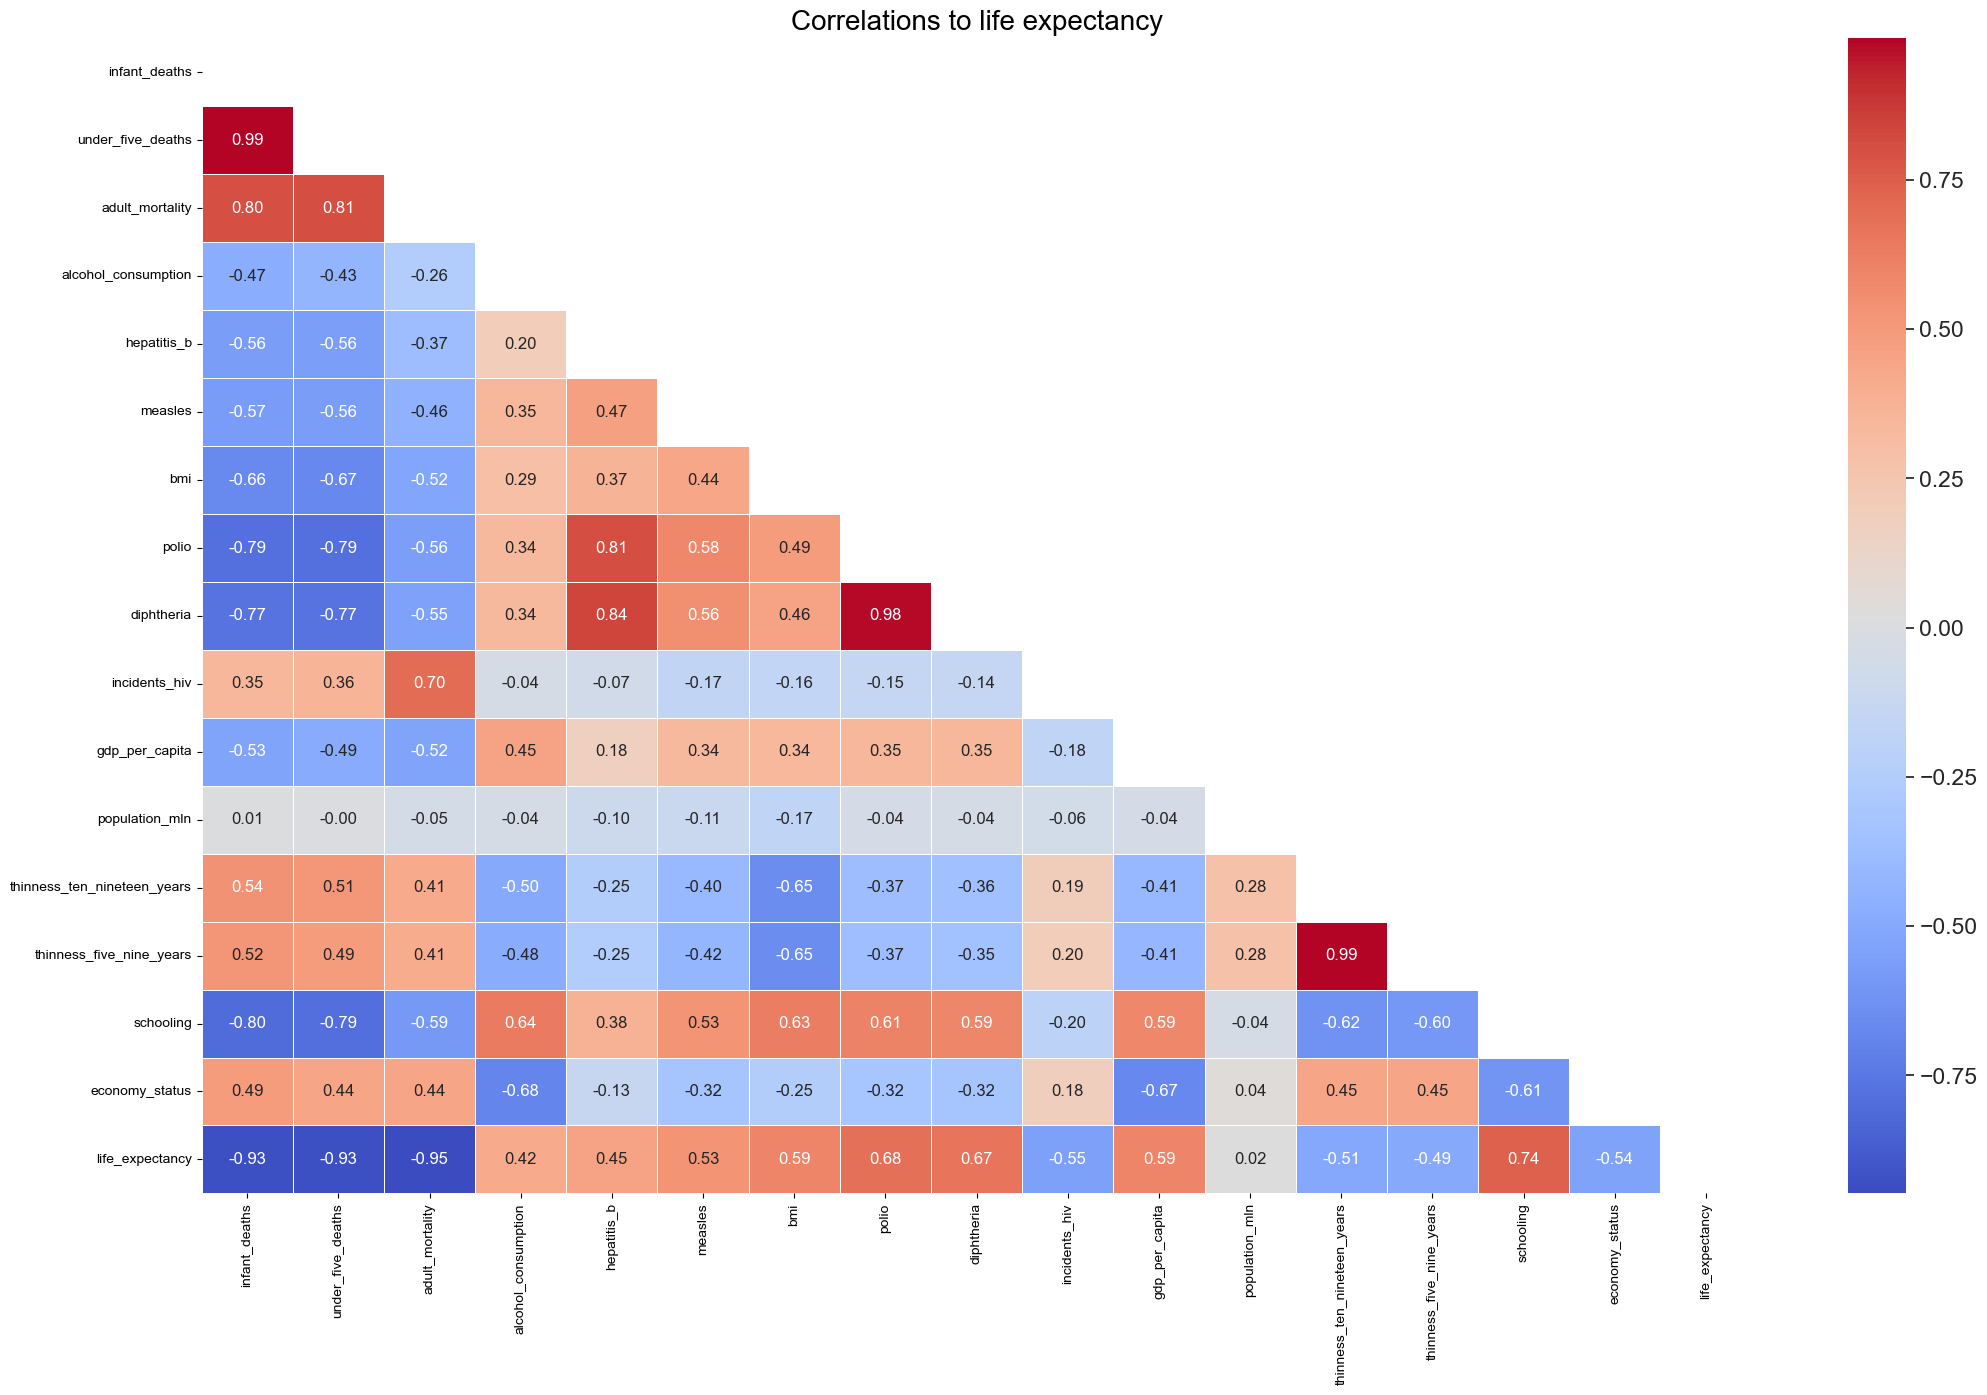

In [8]:
# correlations to life expectancy
correlation_matrix = num.corr()

mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Correlations to life expectancy", fontsize=20)

Text(0, 0.5, 'Count of Countries')

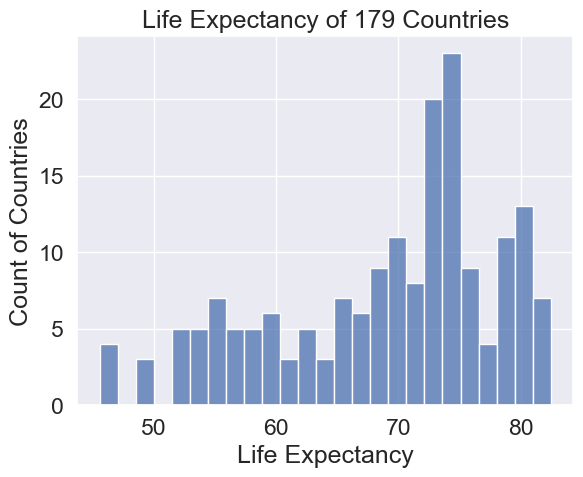

In [9]:
sns.histplot(df["life_expectancy"], bins=25)
plt.xlabel("Life Expectancy")
plt.title("Life Expectancy of 179 Countries")
plt.ylabel("Count of Countries")

<function matplotlib.pyplot.show(close=None, block=None)>

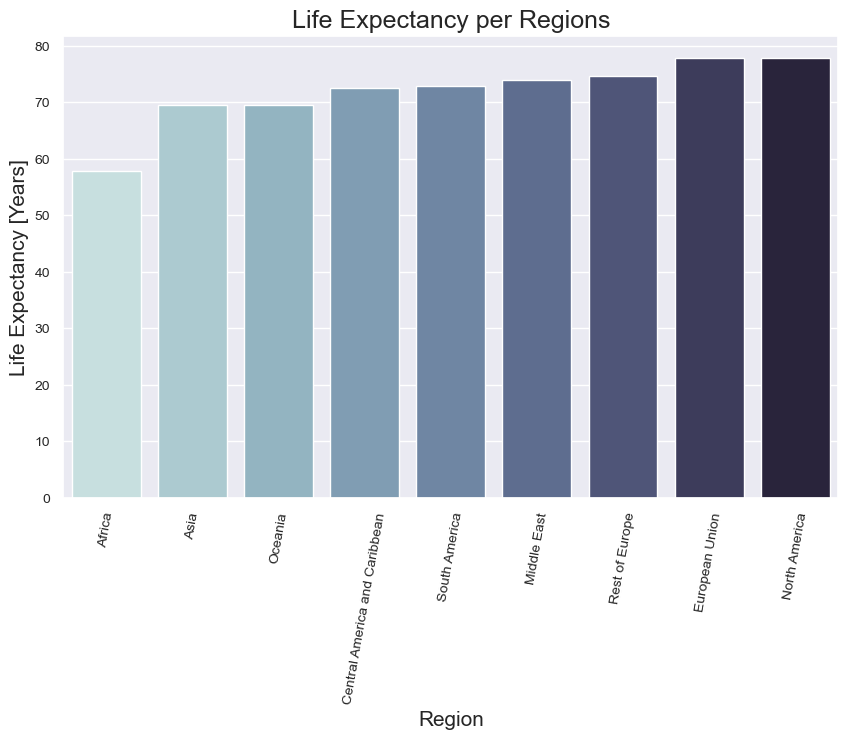

In [10]:
regions = df.groupby("region")["life_expectancy"].mean()
regions_sorted = regions.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=regions_sorted.index, y=regions_sorted.values, palette="ch:start=.2,rot=-.3", hue=regions_sorted.index, legend=False)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Life Expectancy [Years]", fontsize=15)
plt.title("Life Expectancy per Regions")
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)
plt.show

In [11]:
df

,country,region,infant_deaths,under_five_deaths,adult_mortality,alcohol_consumption,hepatitis_b,measles,bmi,polio,diphtheria,incidents_hiv,gdp_per_capita,population_mln,thinness_ten_nineteen_years,thinness_five_nine_years,schooling,economy_status,life_expectancy
0,Afghanistan,Asia,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",South America,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0,72.79375
175,Vietnam,Asia,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0,74.33125
176,"Yemen, Rep.",Middle East,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,Zambia,Africa,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


<function matplotlib.pyplot.show(close=None, block=None)>

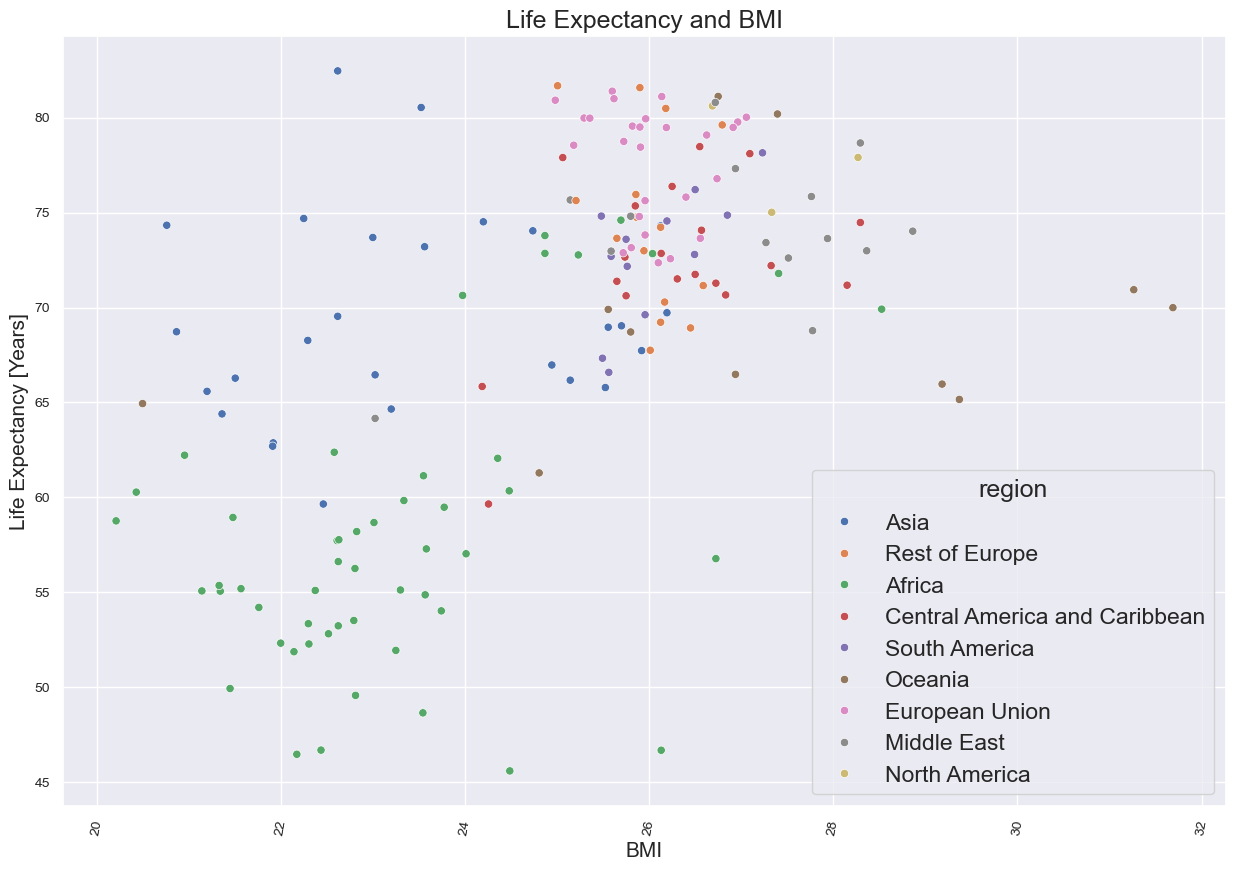

In [12]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="bmi", y="life_expectancy", hue="region")

plt.xlabel("BMI", fontsize=15)
plt.ylabel("Life Expectancy [Years]", fontsize=15)
plt.title("Life Expectancy and BMI")
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)
plt.show

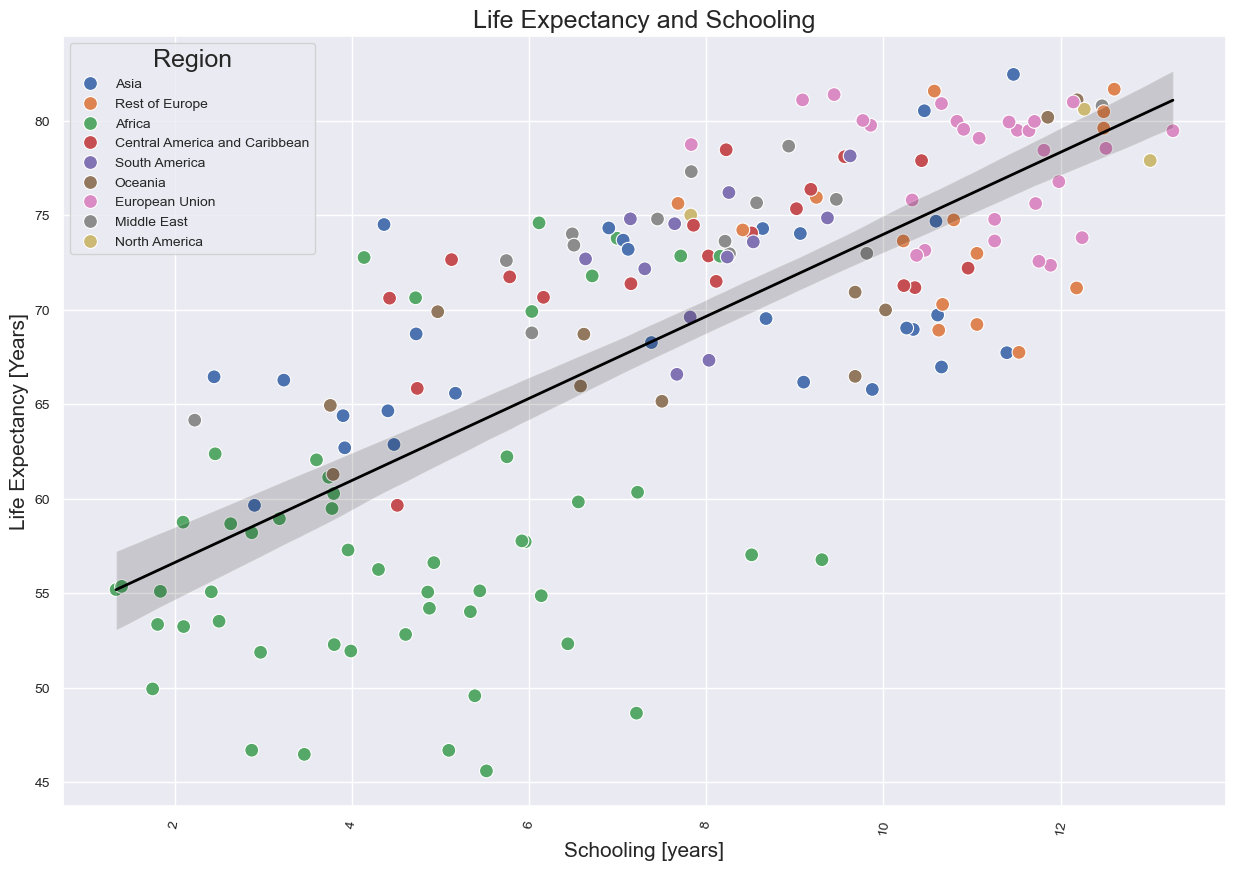

In [13]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="schooling", y="life_expectancy", hue="region", s=100, palette="deep")

sns.regplot(data=df, x="schooling", y="life_expectancy", scatter=False, color='black', line_kws={"linewidth": 2})

plt.xlabel("Schooling [years]", fontsize=15)
plt.ylabel("Life Expectancy [Years]", fontsize=15)
plt.title("Life Expectancy and Schooling", fontsize=18)
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)
plt.legend(title='Region', fontsize=10)
plt.show()

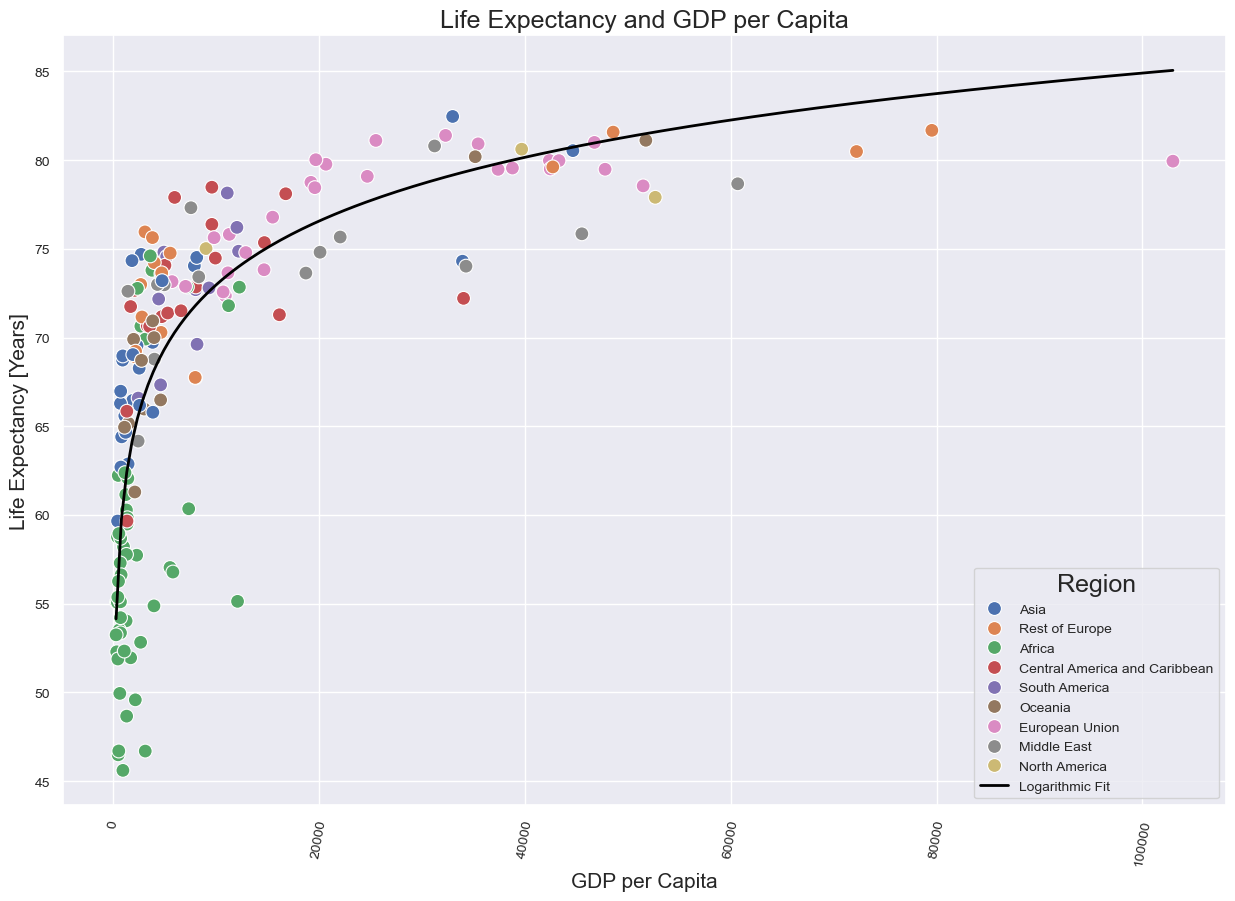

In [14]:
def logarithmic_function(x, a, b, c):
    return a * np.log(b * x) + c

x = df["gdp_per_capita"]
y = df["life_expectancy"]

popt, pcov = curve_fit(logarithmic_function, x, y, p0=(1, 1, 1))

x_vals = np.linspace(x.min(), x.max(), 200)
y_vals = logarithmic_function(x_vals, *popt)

plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x="gdp_per_capita", y="life_expectancy", hue="region", s=100, palette="deep")

plt.plot(x_vals, y_vals, color='black', linewidth=2, label='Logarithmic Fit')

plt.xlabel("GDP per Capita", fontsize=15)
plt.ylabel("Life Expectancy [Years]", fontsize=15)
plt.title("Life Expectancy and GDP per Capita", fontsize=18)
plt.xticks(fontsize=10, rotation=80)
plt.yticks(fontsize=10)
plt.legend(title='Region', fontsize=10)
plt.show()

In [15]:
df.sort_values(by="gdp_per_capita", ascending=False)

,country,region,infant_deaths,under_five_deaths,adult_mortality,alcohol_consumption,hepatitis_b,measles,bmi,polio,diphtheria,incidents_hiv,gdp_per_capita,population_mln,thinness_ten_nineteen_years,thinness_five_nine_years,schooling,economy_status,life_expectancy
96,Luxembourg,European Union,2.68750,3.27500,77.854531,12.149375,92.3750,86.0000,25.96250,98.0625,98.9375,0.085000,102972.6875,0.492500,0.95000,0.91250,11.41875,0.0,79.93750
154,Switzerland,Rest of Europe,4.13750,4.85000,61.564500,10.294375,88.0000,78.0625,25.00625,95.3125,94.5625,0.073125,79544.8125,7.660625,0.53750,0.39375,12.60625,0.0,81.67500
121,Norway,Rest of Europe,3.01250,3.70625,68.403250,6.228750,88.0000,91.9375,26.18125,93.0625,93.0000,0.032500,72224.1875,4.784375,0.76250,0.70000,12.48750,0.0,80.48125
131,Qatar,Middle East,8.48750,9.90000,62.404406,0.992500,95.0625,94.4375,28.29375,95.8750,94.1875,0.050000,60679.1875,1.434375,4.95625,4.58750,8.93125,1.0,78.66250
170,United States,North America,6.47500,7.63125,109.063594,8.595625,91.5000,86.0000,28.26875,92.2500,95.1250,0.128125,52662.9375,302.103125,0.73125,0.60625,13.01250,0.0,77.90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Ethiopia,Africa,62.98125,97.42500,304.331719,0.357500,58.8125,64.0000,20.21250,62.3750,52.9375,0.561250,401.3750,82.463750,8.38125,6.47500,2.09375,1.0,58.76875
37,"Congo, Dem. Rep.",Africa,89.48125,125.81875,298.787625,3.206250,70.8750,64.0000,21.34375,62.9375,61.0000,0.673125,393.7500,60.268750,8.14375,7.95625,4.85625,1.0,55.06875
98,Malawi,Africa,61.68750,102.32500,453.393594,1.677500,88.2500,64.0000,22.30625,89.0625,88.6875,5.590625,324.6875,13.698125,7.11875,6.98750,3.80000,1.0,52.28750
26,Burundi,Africa,69.39375,108.91250,330.922969,5.231875,91.7500,57.3750,21.14375,86.6250,90.2500,0.746875,309.1250,8.090000,8.01875,8.01250,2.41250,1.0,55.08125


/var/folders/4d/kvxdy8f57vb9008_7qx5gx780000gn/T/ipykernel_74840/279279095.py:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.boxplot(data=diseases, palette=sns.light_palette("blue"))


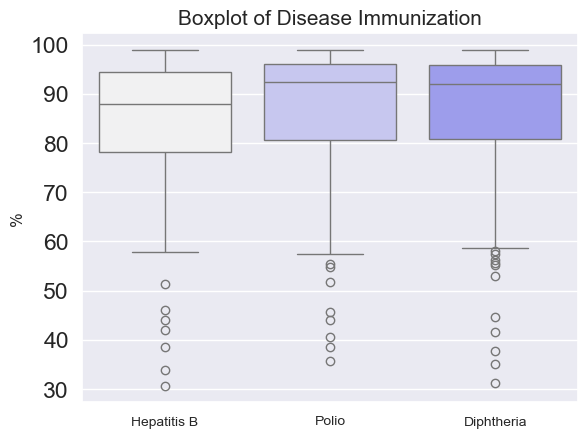

In [16]:
diseases = df[['hepatitis_b', 'polio', 'diphtheria']]

sns.boxplot(data=diseases, palette=sns.light_palette("blue"))

plt.xticks(ticks=range(len(diseases.columns)), labels=["Hepatitis B", "Polio", "Diphtheria"], fontsize=10)
plt.ylabel("%", fontsize=12)

plt.title("Boxplot of Disease Immunization", fontsize=15)
plt.show()